# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/visualization`
### Do One.

In [24]:
# imports for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.


In [28]:
df = pd.read_csv("college_completion.csv")

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.


In [29]:
print(df.shape)
print(df.columns)
df.head()

(3798, 63)
Index(['index', 'unitid', 'chronname', 'city', 'state', 'level', 'control',
       'basic', 'hbcu', 'flagship', 'long_x', 'lat_y', 'site', 'student_count',
       'awards_per_value', 'awards_per_state_value', 'awards_per_natl_value',
       'exp_award_value', 'exp_award_state_value', 'exp_award_natl_value',
       'exp_award_percentile', 'ft_pct', 'fte_value', 'fte_percentile',
       'med_sat_value', 'med_sat_percentile', 'aid_value', 'aid_percentile',
       'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'vsa_year',
       'vsa_grad_after4_first', 'vsa_grad_elsewhere_after4_first',
       'vsa_enroll_after4_first', 'vsa_enroll_elsewhere_after4_first',
       'vsa_grad_after6_first', 'vsa_grad_elsewhere_after6_first',
       'vsa_enroll_after6_first', 'vsa_enroll_elsewhere_after6

,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882.0
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376.0
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3.0
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0.0,0.0,0.0,0.0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759.0
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351.0


3. Cross tabulate `control` and `level`. Describe the patterns you see.

Most private colleges, whether for-profit or non-profit, are primarily 4-year institutions, with non-profit ones being more common. In contrast, public colleges are more often 2-year institutions.


In [30]:
crosstab1 = pd.crosstab(df['control'], df['level'])
print(crosstab1)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.


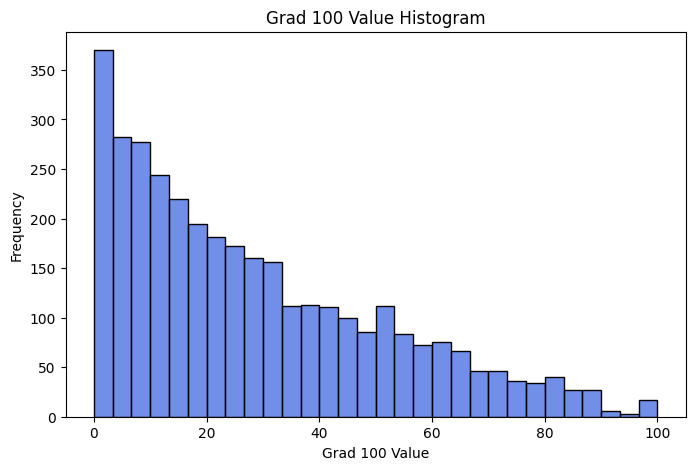

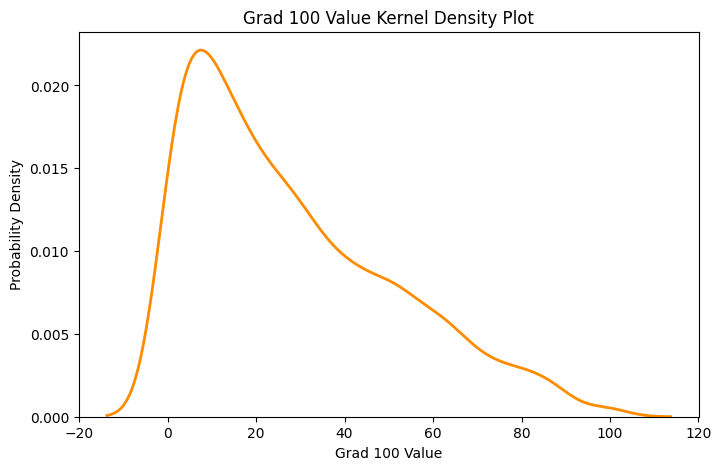

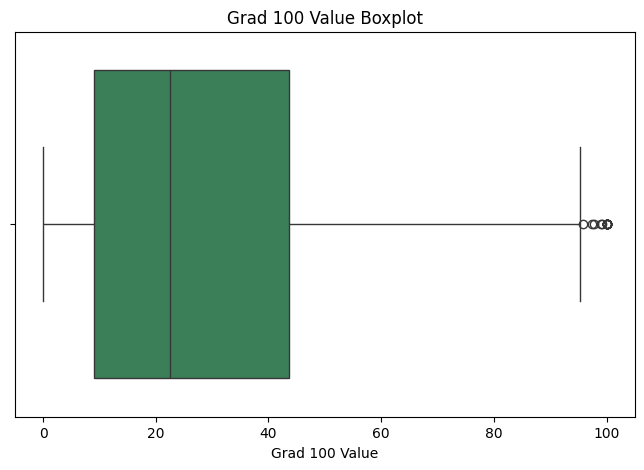

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [31]:
sns.set_palette("pastel")

# Histogram
plt.figure(figsize=(8, 5))
hist = sns.histplot(data=df, x='grad_100_value', color='royalblue', edgecolor='black', bins=30)
hist.set(title="Grad 100 Value Histogram", xlabel='Grad 100 Value', ylabel='Frequency')
plt.show()

# Kernel Density Plot
plt.figure(figsize=(8, 5))
kern = sns.kdeplot(data=df, x='grad_100_value', color='darkorange', linewidth=2)
kern.set(title="Grad 100 Value Kernel Density Plot", xlabel='Grad 100 Value', ylabel='Probability Density')
plt.show()

# Boxplot
plt.figure(figsize=(8, 5))
box = sns.boxplot(data=df, x='grad_100_value', color='seagreen')
box.set(title="Grad 100 Value Boxplot", xlabel='Grad 100 Value')
plt.show()

# Print summary statistics
print(df["grad_100_value"].describe())


5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?

Private institutions tend to have the highest graduation rates, with non-profit private schools having the highest average graduation rate within the private sector.

<ipython-input-32-551dae302ba3>:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Control")


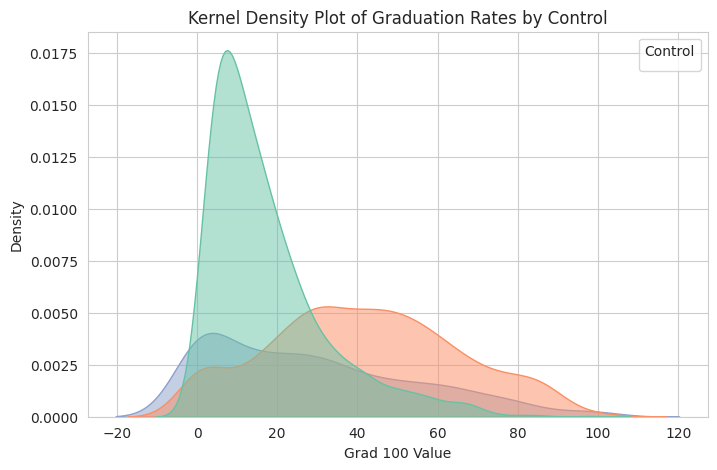

<ipython-input-32-551dae302ba3>:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Level")


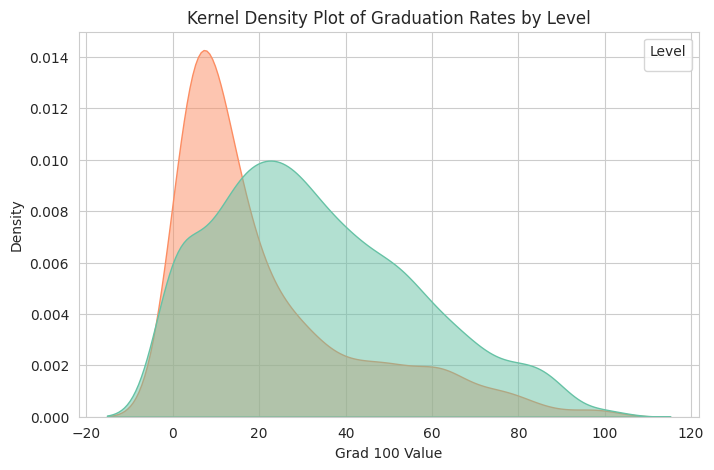

                                count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                    

In [32]:
sns.set_style("whitegrid")
sns.set_palette("Set2")

# KDE Plot: Graduation Rates by Control
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="grad_100_value", hue="control", fill=True, alpha=0.5)
plt.xlabel("Grad 100 Value")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rates by Control")
plt.legend(title="Control")
plt.show()

# KDE Plot: Graduation Rates by Level
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="grad_100_value", hue="level", fill=True, alpha=0.5)
plt.xlabel("Grad 100 Value")
plt.ylabel("Density")
plt.title("Kernel Density Plot of Graduation Rates by Level")
plt.legend(title="Level")
plt.show()

# Print summary statistics grouped by 'control' and 'level'
print(df.groupby(['control', 'level'])['grad_100_value'].describe())

6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?

Four-year private non-profit institutions have the highest graduation rates.

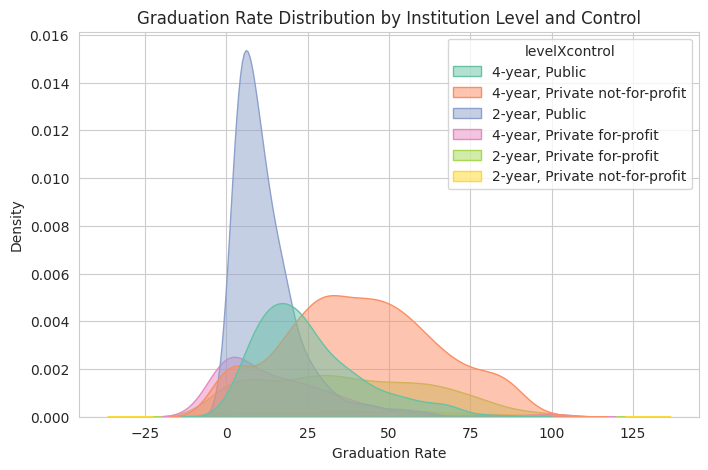

In [33]:
df['levelXcontrol'] = df['level'] + ", " + df['control']

# KDE distribution
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x='grad_100_value', hue='levelXcontrol', fill=True, alpha=0.5)
plt.title('Graduation Rate Distribution by Institution Level and Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.show()


7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.

Students at 4-year institutions tend to receive higher aid amounts, likely because these schools have higher costs compared to 2-year institutions.

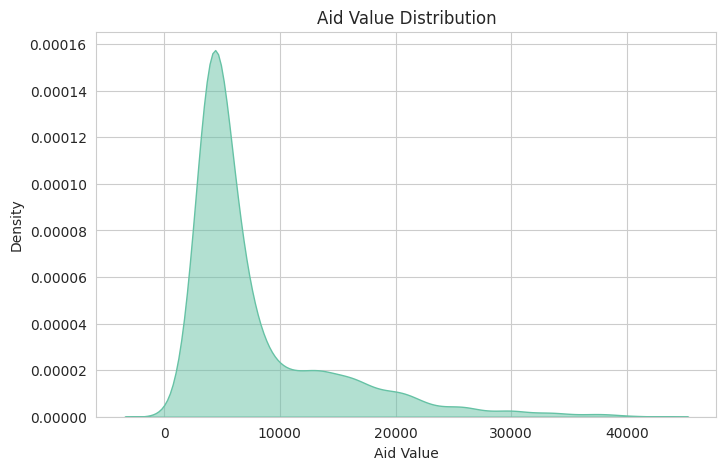

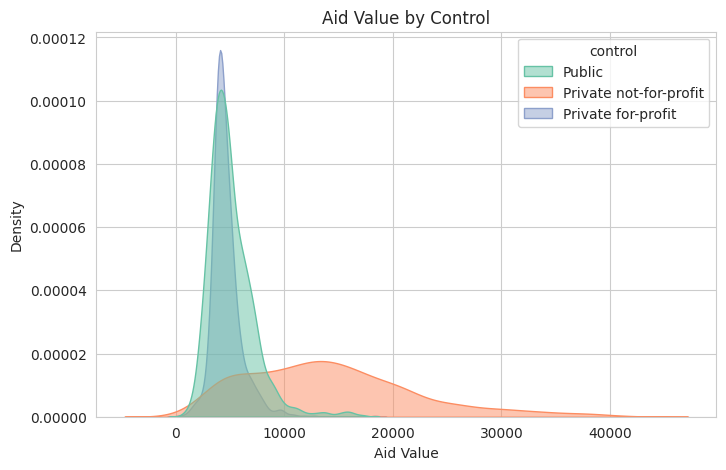

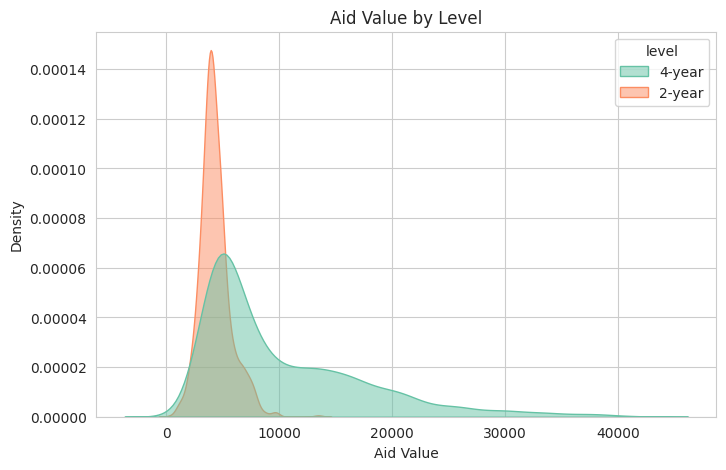

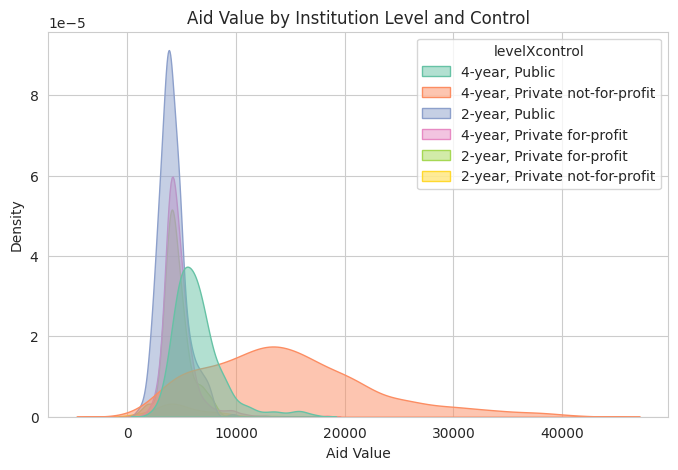

                                count          mean          std     min  \
control                level                                               
Private for-profit     2-year   464.0   4559.681034  1286.688269   294.0   
                       4-year   527.0   4696.062619  1489.410020  1580.0   
Private not-for-profit 2-year    68.0   5128.058824  2590.449946   934.0   
                       4-year  1180.0  14702.401695  7649.775203   902.0   
Public                 2-year   926.0   4126.199784  1260.271382   881.0   
                       4-year   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
control                level                                        
Private for-profit     2-year  3818.75   4286.5   5122.00   9727.0  
                       4-year  3885.50   4364.0   5131.50  18355.0  
Private not-for-profit 2-year  3650.00   4516.5   6311.50  13654.0  
                       4-year  9113.25  13774.

In [34]:
sns.set_style("whitegrid")

# List of KDE plots
kde_plots = [
    {"x": "aid_value", "hue": None, "title": "Aid Value Distribution"},
    {"x": "aid_value", "hue": "control", "title": "Aid Value by Control"},
    {"x": "aid_value", "hue": "level", "title": "Aid Value by Level"},
    {"x": "aid_value", "hue": "levelXcontrol", "title": "Aid Value by Institution Level and Control"}
]

# KDE plots
for plot in kde_plots:
    plt.figure(figsize=(8, 5))
    sns.kdeplot(data=df, x=plot["x"], hue=plot["hue"], fill=True, alpha=0.5)
    plt.xlabel("Aid Value")
    plt.ylabel("Density")
    plt.title(plot["title"])
    plt.show()

print(df.groupby(['control', 'level'])['aid_value'].describe())

8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

Higher financial aid is linked to higher graduation rates in 4-year institutions, especially private non-profits. However, in 2-year schools, aid has little impact. This suggests financial support plays a key role in student success where costs are higher.

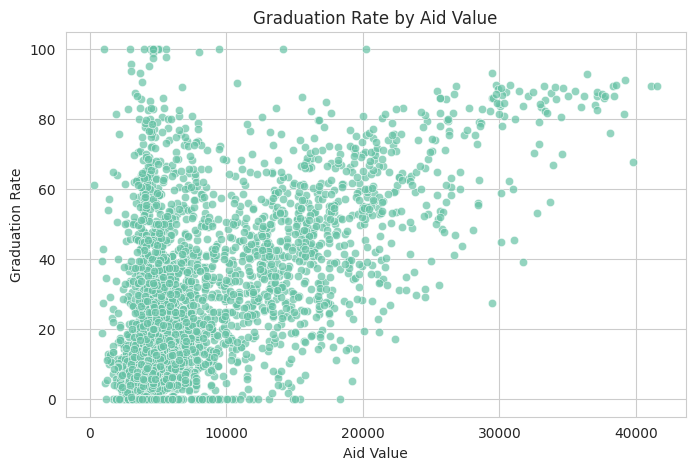

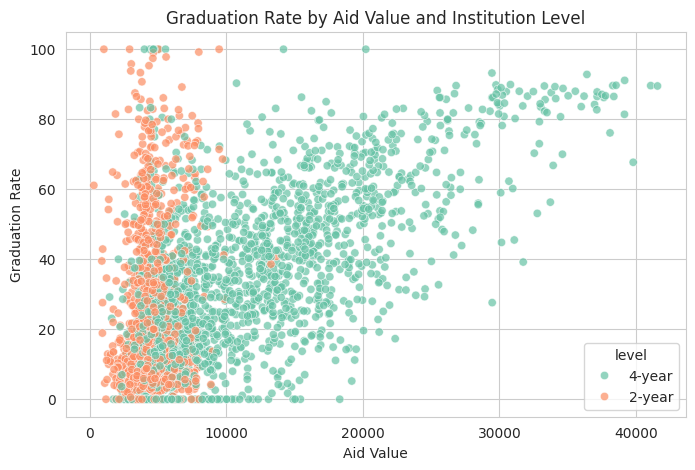

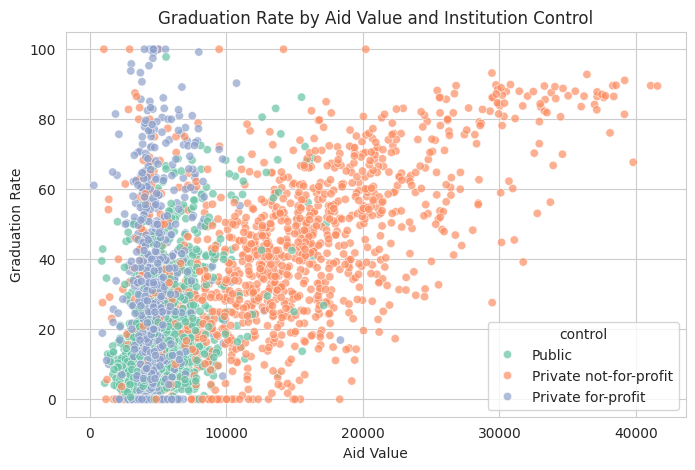

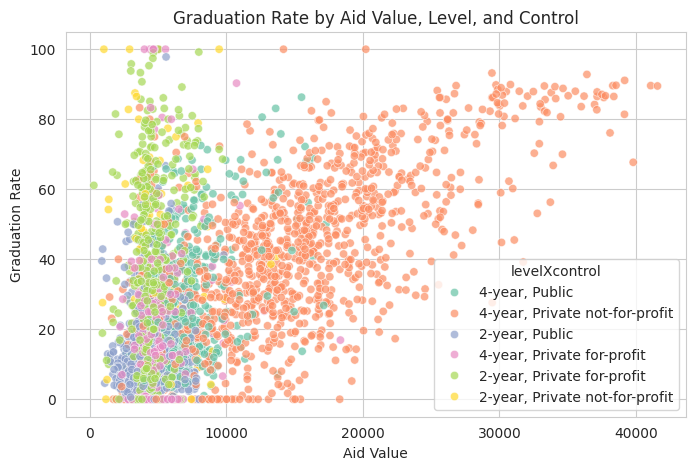

In [35]:
sns.set_style("whitegrid")

# scatter plots
scatter_plots = [
    {"hue": None, "title": "Graduation Rate by Aid Value"},
    {"hue": "level", "title": "Graduation Rate by Aid Value and Institution Level"},
    {"hue": "control", "title": "Graduation Rate by Aid Value and Institution Control"},
    {"hue": "levelXcontrol", "title": "Graduation Rate by Aid Value, Level, and Control"}
]

for plot in scatter_plots:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='aid_value', y='grad_100_value', hue=plot["hue"], alpha=0.7)
    plt.xlabel("Aid Value")
    plt.ylabel("Graduation Rate")
    plt.title(plot["title"])
    plt.show()
